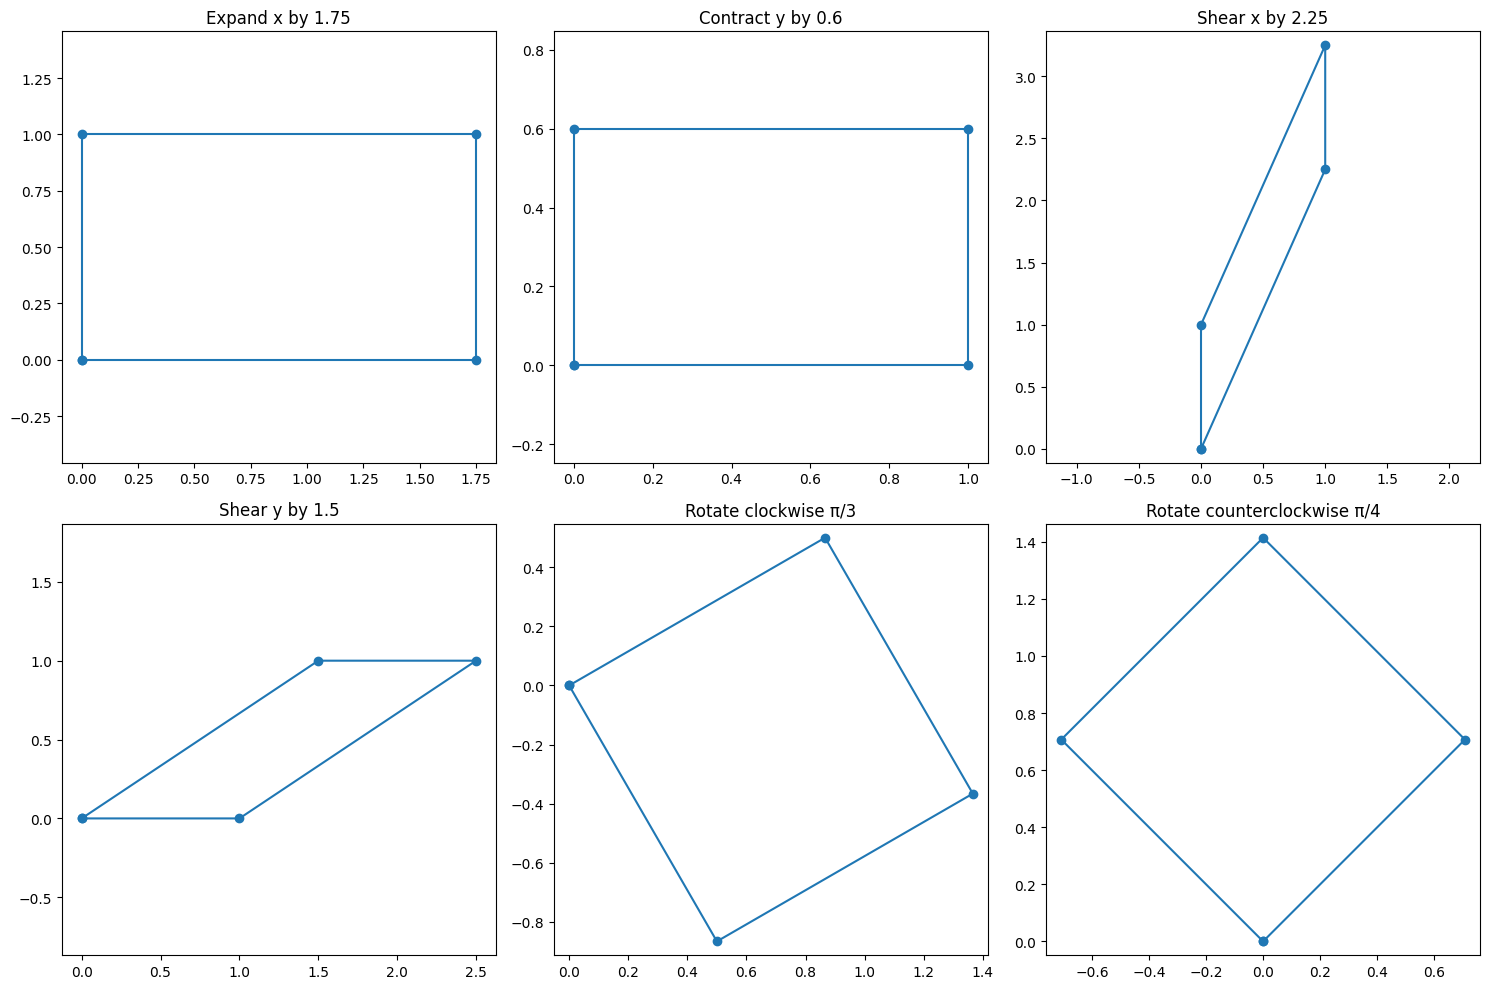

M1:
[[1.75 0.  ]
 [0.   1.  ]] 

M2:
[[1.  0. ]
 [0.  0.6]] 

M3:
[[1.   0.  ]
 [2.25 1.  ]] 

M4:
[[1.  1.5]
 [0.  1. ]] 

M5:
[[ 0.5        0.8660254]
 [-0.8660254  0.5      ]] 

M6:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 



In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original vertices of the square S
vertices = np.array([[0, 0], [0, 1], [1, 1], [1, 0], [0, 0]])  # Closing the square by repeating the first point

# Define transformation matrices
M1 = np.array([[1.75, 0], [0, 1]])  # Expand x by a factor of 1.75
M2 = np.array([[1, 0], [0, 0.6]])  # Contract y by a factor of 0.6
M3 = np.array([[1, 0], [2.25, 1]])  # Shear along x by a factor of 2.25
M4 = np.array([[1, 1.5], [0, 1]])  # Shear along y by a factor of 1.5
M5 = np.array([[np.cos(-np.pi/3), -np.sin(-np.pi/3)], [np.sin(-np.pi/3), np.cos(-np.pi/3)]])  # Clockwise rotation by π/3
M6 = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)], [np.sin(np.pi/4), np.cos(np.pi/4)]])  # Counterclockwise rotation by π/4

# Initialize plot
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()
transformations = [M1, M2, M3, M4, M5, M6]
titles = ['Expand x by 1.75', 'Contract y by 0.6', 'Shear x by 2.25', 'Shear y by 1.5', 'Rotate clockwise π/3', 'Rotate counterclockwise π/4']

# Apply transformations and plot
for i, (M, title) in enumerate(zip(transformations, titles)):
    transformed_vertices = vertices @ M.T  # Applying transformation
    axs[i].plot(transformed_vertices[:, 0], transformed_vertices[:, 1], '-o')
    axs[i].set_title(title)
    axs[i].axis('equal')

plt.tight_layout()
plt.show()

matrix_names = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6']
for name, matrix in zip(matrix_names, [M1, M2, M3, M4, M5, M6]):
    print(f"{name}:")
    print(matrix, "\n")

Q2


For each matrix M1, . . . ,M6 above compute the corresponding
inverses M1
−1
, . . . ,M6
−1


In [7]:
# Calculate the inverses
M1_inv = np.linalg.inv(M1)
M2_inv = np.linalg.inv(M2)
M3_inv = np.linalg.inv(M3)
M4_inv = np.linalg.inv(M4)
M5_inv = np.linalg.inv(M5)
M6_inv = np.linalg.inv(M6)

inverses = [M1_inv, M2_inv, M3_inv, M4_inv, M5_inv, M6_inv]
inverse_names = ['M1^(-1)', 'M2^(-1)', 'M3^(-1)', 'M4^(-1)', 'M5^(-1)', 'M6^(-1)']
for name, inverse in zip(inverse_names, inverses):
    print(f"{name}:")
    print(inverse, "\n")

M1^(-1):
[[0.57142857 0.        ]
 [0.         1.        ]] 

M2^(-1):
[[1.         0.        ]
 [0.         1.66666667]] 

M3^(-1):
[[ 1.    0.  ]
 [-2.25  1.  ]] 

M4^(-1):
[[ 1.  -1.5]
 [ 0.   1. ]] 

M5^(-1):
[[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]] 

M6^(-1):
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]] 



Q3

(both by hand and by Python/R).
Recall that the inverse M−1
for a 2 × 2 matrix
M can be computed as follows:

and plot the quadrilateral A′B′C
′D′
(4-sided polygon) after
applying the following transformations (from left to right) to S
1. (M1 ^2)(M3^3)M5
2. (M2^−1)(M4^−2)M6

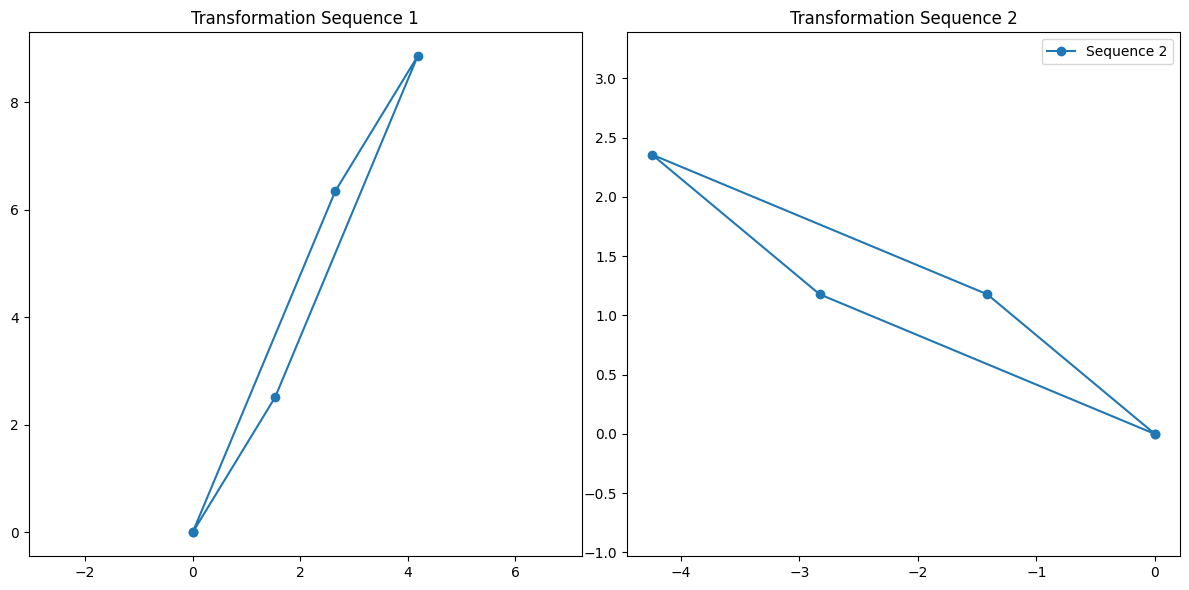

Final Transformation Matrix for Sequence 1:   M1^2  M3^3   M5
[[1.53125    2.6522028 ]
 [2.5089746  6.34567148]] 

Final Transformation Matrix for Sequence 2:    M2^-1   M4^-2   M6
[[-1.41421356 -2.82842712]
 [ 1.1785113   1.1785113 ]]


In [10]:
# Compute the transformation sequences as matrices
sequence1 = np.linalg.matrix_power(M1, 2) @ np.linalg.matrix_power(M3, 3) @ M5
sequence2 = np.linalg.matrix_power(M2_inv, 1) @ np.linalg.matrix_power(M4_inv, 2) @ M6

# Original vertices of the square S
original_vertices = np.array([[0, 0], [0, 1], [1, 1], [1, 0]])

# Apply transformations to vertices
transformed_vertices1 = original_vertices @ sequence1.T
transformed_vertices2 = original_vertices @ sequence2.T

# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first transformation sequence
axs[0].plot(np.append(transformed_vertices1[:, 0], transformed_vertices1[0, 0]), 
            np.append(transformed_vertices1[:, 1], transformed_vertices1[0, 1]), '-o', label='Sequence 1')
axs[0].set_title('Transformation Sequence 1')
axs[0].axis('equal')

# Plotting the second transformation sequence
axs[1].plot(np.append(transformed_vertices2[:, 0], transformed_vertices2[0, 0]), 
            np.append(transformed_vertices2[:, 1], transformed_vertices2[0, 1]), '-o', label='Sequence 2')
axs[1].set_title('Transformation Sequence 2')
axs[1].axis('equal')

plt.legend()
plt.tight_layout()
plt.show()



print("Final Transformation Matrix for Sequence 1:   M1^2  M3^3   M5")
print(sequence1, "\n")

print("Final Transformation Matrix for Sequence 2:    M2^-1   M4^-2   M6")
print(sequence2)

Q4


Invert the following matrices using the GaussJordan method
A =

1 2
3 4
, B =
5 9
2 5
, C =
2 1 0
3 6 1
5 7 1

In [11]:
def gauss_jordan_inverse(matrix):
    n = matrix.shape[0]
    aug_matrix = np.hstack((matrix, np.eye(n)))  # Augment matrix with the identity matrix
    for col in range(n):
        # Make the diagonal contain all 1s
        diag_factor = aug_matrix[col, col]
        aug_matrix[col, :] = aug_matrix[col, :] / diag_factor
        for row in range(n):
            if row != col:
                # Eliminate all other entries in the current column
                factor = aug_matrix[row, col]
                aug_matrix[row, :] = aug_matrix[row, :] - factor * aug_matrix[col, :]
    return aug_matrix[:, n:]  # Extract the right half as the inverse

# Define matrices A, B, C
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 9], [2, 5]])
C = np.array([[2, 1, 0], [3, 6, 1], [5, 7, 1]])

# Calculate the inverses using the Gauss-Jordan method
A_inv = gauss_jordan_inverse(A)
B_inv = gauss_jordan_inverse(B)
C_inv = gauss_jordan_inverse(C)

print("Inverse of A:")
print(A_inv)
print("\nInverse of B:")
print(B_inv)
print("\nInverse of C:")
print(C_inv)
print("C does not have an invert")

Inverse of A:
[[-2.   1. ]
 [ 1.5 -0.5]]

Inverse of B:
[[ 0.71428571 -1.28571429]
 [-0.28571429  0.71428571]]

Inverse of C:
[[-inf -inf  inf]
 [ inf  inf -inf]
 [-inf -inf  inf]]


/var/folders/xj/6x2n4np15ws3mn1htrpzqmfr0000gn/T/ipykernel_3883/1683221504.py:7: RuntimeWarning: divide by zero encountered in divide
  aug_matrix[col, :] = aug_matrix[col, :] / diag_factor
/var/folders/xj/6x2n4np15ws3mn1htrpzqmfr0000gn/T/ipykernel_3883/1683221504.py:7: RuntimeWarning: invalid value encountered in divide
  aug_matrix[col, :] = aug_matrix[col, :] / diag_factor


Q5

Consider the matrices
A =
1 2
3 4
, B =
5 9
2 5
Compute the following logarithms of matrices (take the first 3
terms only in the expansion for log(M)):
1. log(A)
2. log(A−1)
3. log(B)
4. log(B−1)

In [12]:
# Define matrices A and B
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 9], [2, 5]])

# Compute inverses
A_inv = np.linalg.inv(A)
B_inv = np.linalg.inv(B)

# Identity matrices for A and B
I_A = np.eye(2)
I_B = np.eye(2)

# Function to compute the first 3 terms of the matrix logarithm approximation
def matrix_log_approximation(M):
    M_I = M - I_A if M.shape == (2, 2) else M - I_B
    return M_I - 0.5 * np.linalg.matrix_power(M_I, 2) + (1/3) * np.linalg.matrix_power(M_I, 3)

# Compute the logarithms
log_A = matrix_log_approximation(A)
log_A_inv = matrix_log_approximation(A_inv)
log_B = matrix_log_approximation(B)
log_B_inv = matrix_log_approximation(B_inv)

# Print the results
print("log(A):")
print(log_A)
print("\nlog(A^(-1)):")
print(log_A_inv)
print("\nlog(B):")
print(log_B)
print("\nlog(B^(-1)):")
print(log_B_inv)

log(A):
[[ 3.   9. ]
 [13.5 16.5]]

log(A^(-1)):
[[-21.    9. ]
 [ 13.5  -7.5]]

log(B):
[[ 80.33333333 171.        ]
 [ 38.          80.33333333]]

log(B^(-1)):
[[-0.62293489 -1.9154519 ]
 [-0.42565598 -0.62293489]]


Q6


Solve the following systems of equations by
Gaussian elimination and by Python/R
1.

2x + 3y = 8
2x − y = 0
2.

x + 2y = −2
2x + y = 2
3.



2x + 3y + 4z = 4
x − y + z = 1
2x − y + z = 1
4.



x + y + z = 1
2x + y + z = 2
x + 2y + 2z = 1

In [14]:
import numpy as np
from scipy.linalg import solve

# System 1
A1 = np.array([[2, 3], [2, -1]])
b1 = np.array([8, 0])

# System 2
A2 = np.array([[1, 2], [2, 1]])
b2 = np.array([-2, 2])

# System 3
A3 = np.array([[2, 3, 4], [1, -1, 1], [2, -1, 1]])
b3 = np.array([4, 1, 1])


# System 4
A4 = np.array([[1, 1, 1], [2, 1, 1], [1, 2, 2]])
b4 = np.array([1, 2, 1])
# Solve the systems

solution1 = solve(A1, b1)
solution2 = solve(A2, b2)
solution3 = solve(A3, b3)
solution4 = solve(A4, b4)

# Print the solutions
print("Solution for System 1:", solution1)
print("Solution for System 2:", solution2)
print("Solution for System 3:", solution3)
print("Solution for System 4:", solution4)

Solution for System 1: [1. 2.]
Solution for System 2: [ 2. -2.]
Solution for System 3: [ 0. -0.  1.]
Solution for System 4: [1. 0. 0.]


/var/folders/xj/6x2n4np15ws3mn1htrpzqmfr0000gn/T/ipykernel_3883/2242983397.py:25: LinAlgWarning: Ill-conditioned matrix (rcond=3.46945e-18): result may not be accurate.
  solution4 = solve(A4, b4)
